In [8]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from audio_features import *

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


In [15]:
feature_file = '241103_1441_features.csv'
training_data = './TRAINING_DATA/PREPARED/outro/'

In [39]:
# Step 1: extract features or load features
# features, filenames = extract_features_from_directory(training_data)
# write_features_to_file(features, filenames, feature_file)
features, filenames = read_features_from_file(feature_file)

Extracting features: 100%|█████████████████████████████████████████████████████| 1370/1370 [00:43<00:00, 31.84it/s]
2024-11-03 15:04:36,405 - INFO - Features written to 241103_1441_features.csv
INFO:audio_features:Features written to 241103_1441_features.csv


In [40]:
# Step 2: Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

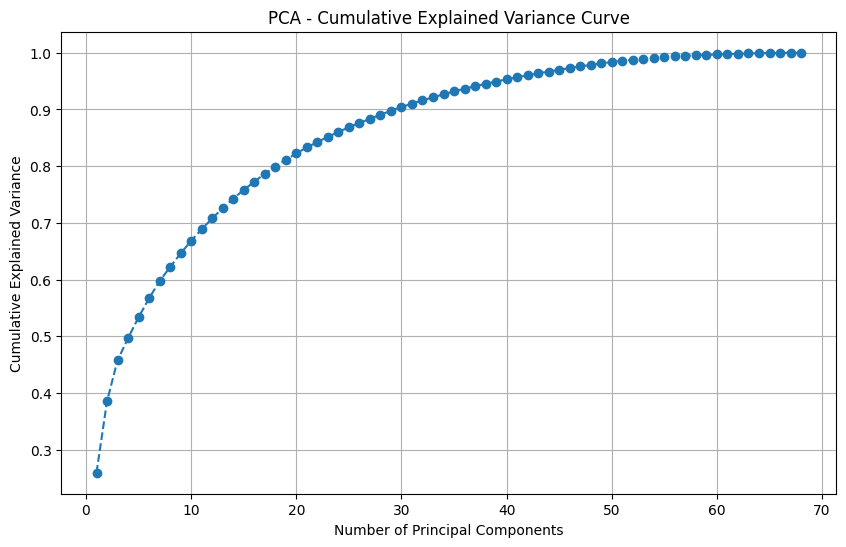

In [48]:
# Apply PCA to visualize explained variance
pca = PCA()
features_pca = pca.fit_transform(features_normalized)

# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance Curve')
plt.grid()
plt.show()

In [49]:
pca = PCA(n_components=20)  # Experiment with fewer components
features_reduced = pca.fit_transform(features_normalized)

# Apply DBSCAN on the reduced feature set
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(features_reduced)

In [55]:
best_eps = None
best_min_samples = None
best_num_clusters = 0

for eps in np.linspace(0.01, 3, num=30):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(features_reduced)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        num_noise = list(labels).count(-1)

        if num_clusters > best_num_clusters and num_noise < len(labels) * 0.5:
            best_eps = eps
            best_min_samples = min_samples
            best_num_clusters = num_clusters

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best number of clusters: {best_num_clusters}')


Best eps: None, Best min_samples: None, Best number of clusters: 0


In [52]:
float_range = np.linspace(0.01, 0.5, num=20)


eps=0.01; min_samples=2


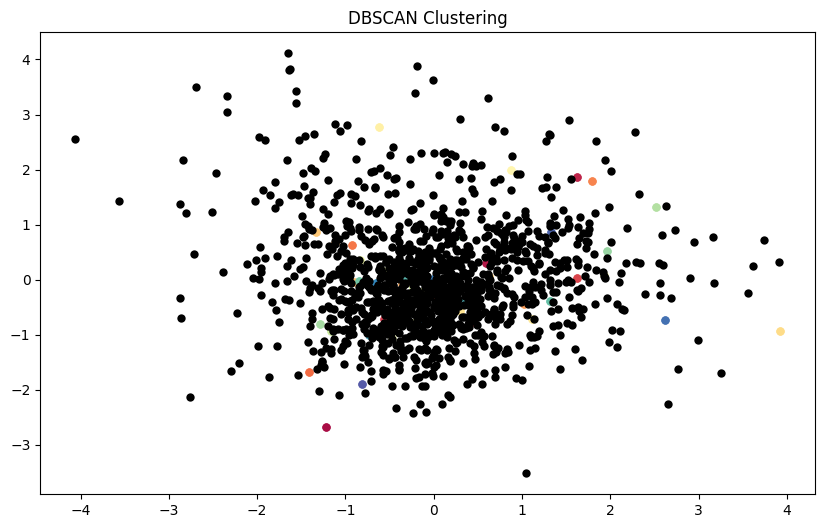

eps=0.01; min_samples=3


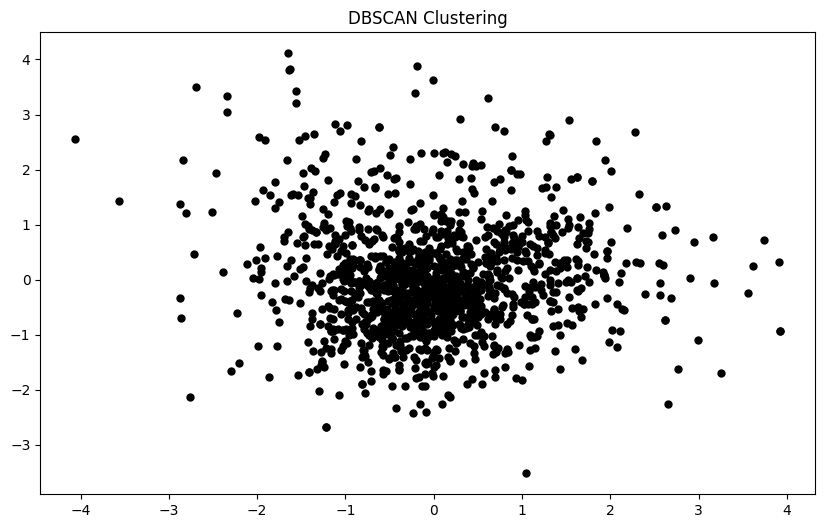

eps=0.01; min_samples=4


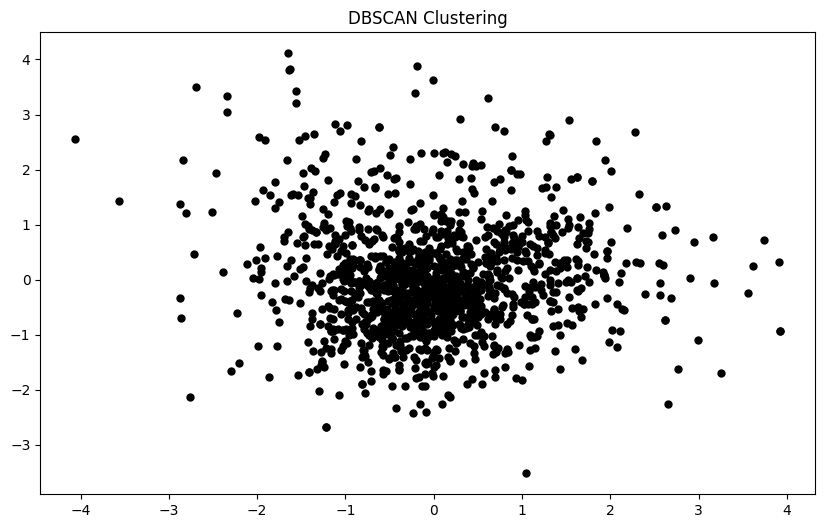

eps=0.035789473684210524; min_samples=2


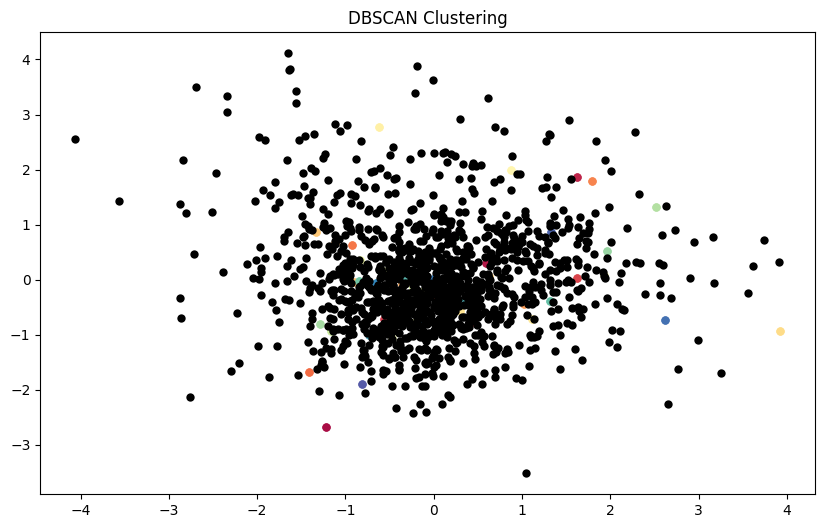

eps=0.035789473684210524; min_samples=3


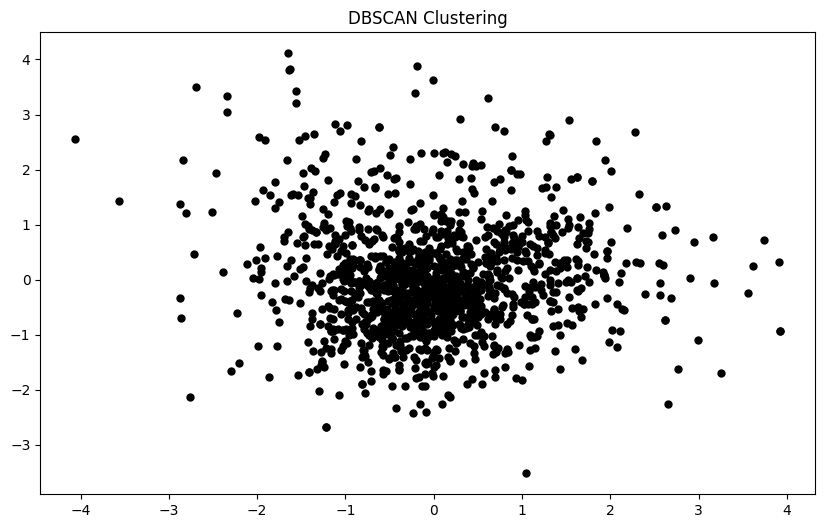

eps=0.035789473684210524; min_samples=4


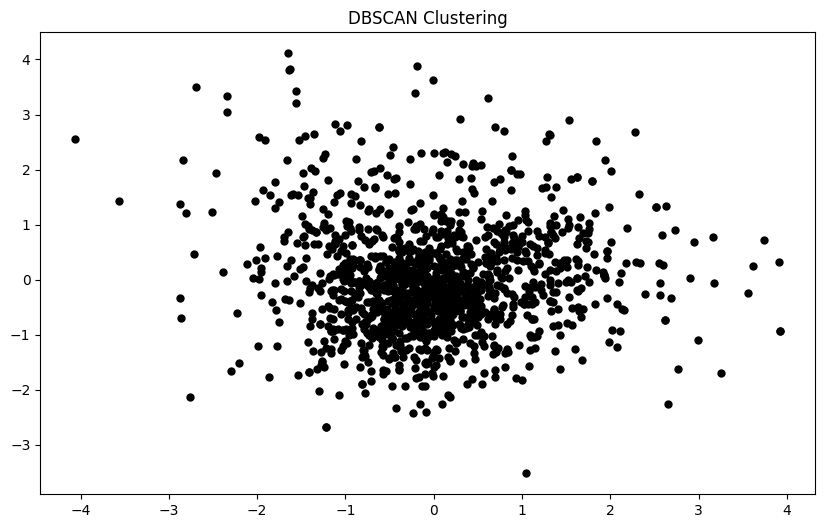

eps=0.06157894736842105; min_samples=2


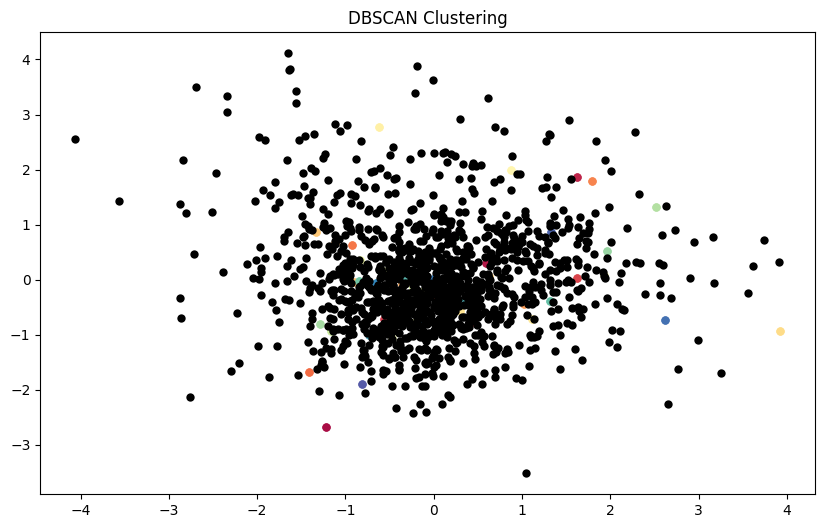

eps=0.06157894736842105; min_samples=3


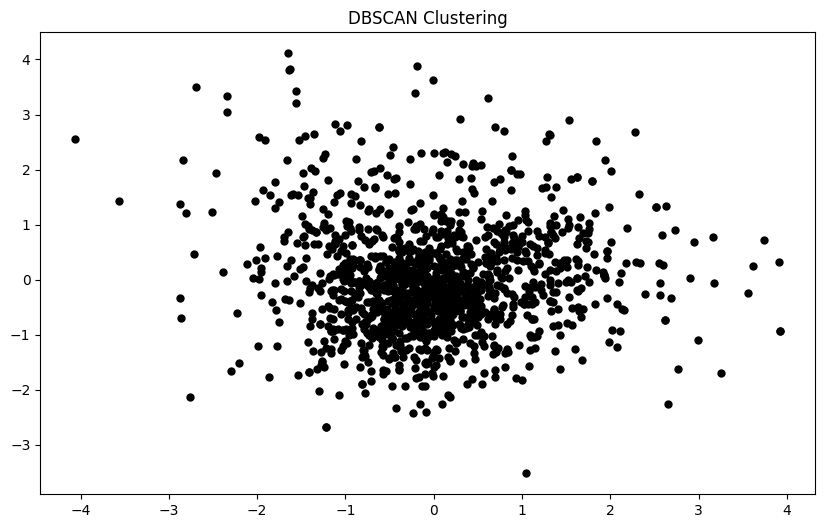

eps=0.06157894736842105; min_samples=4


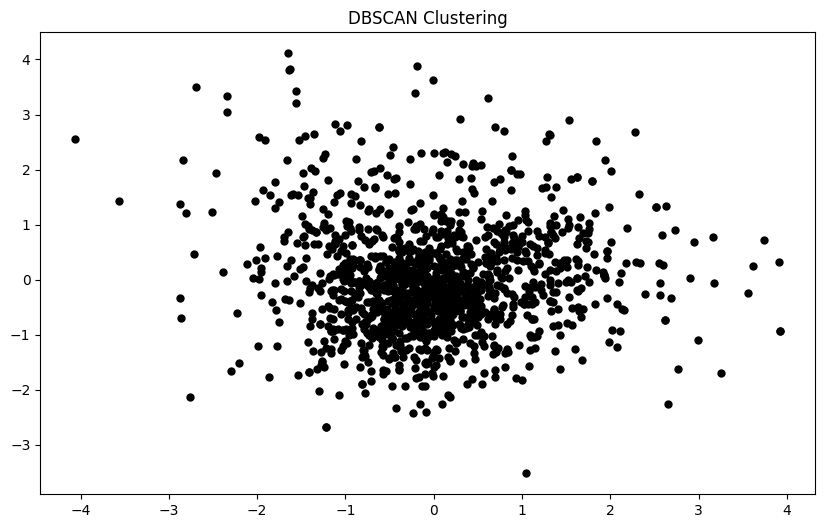

eps=0.08736842105263157; min_samples=2


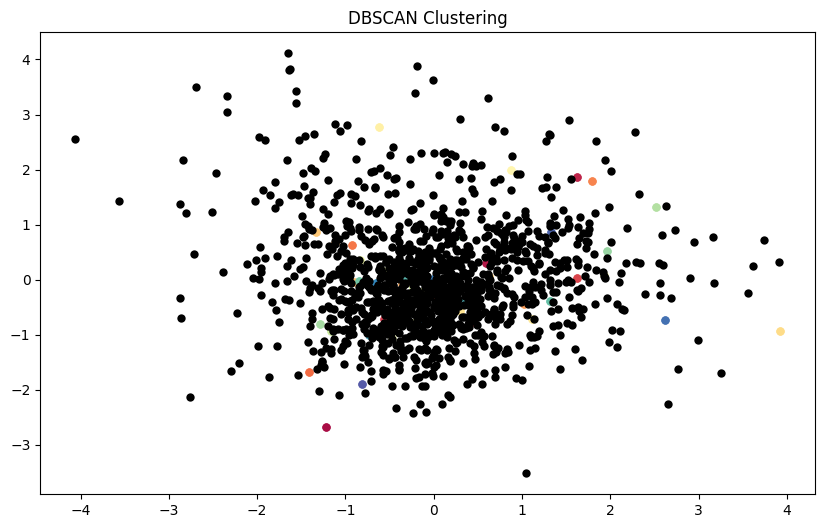

eps=0.08736842105263157; min_samples=3


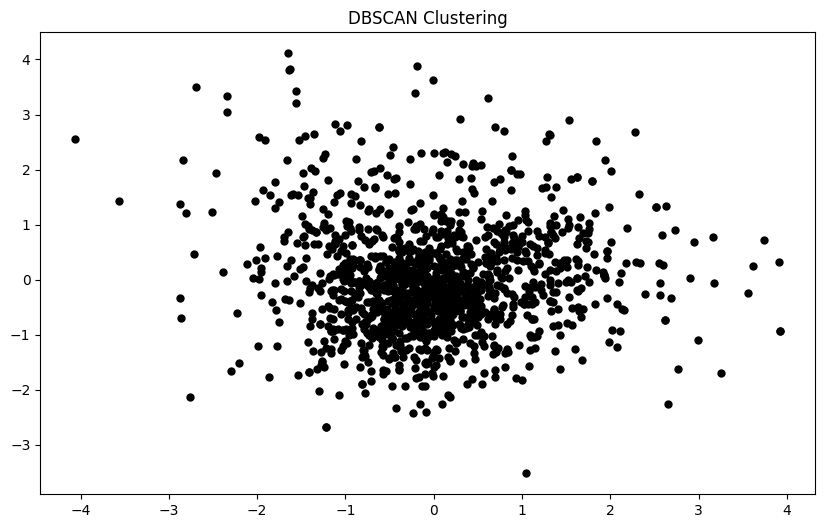

eps=0.08736842105263157; min_samples=4


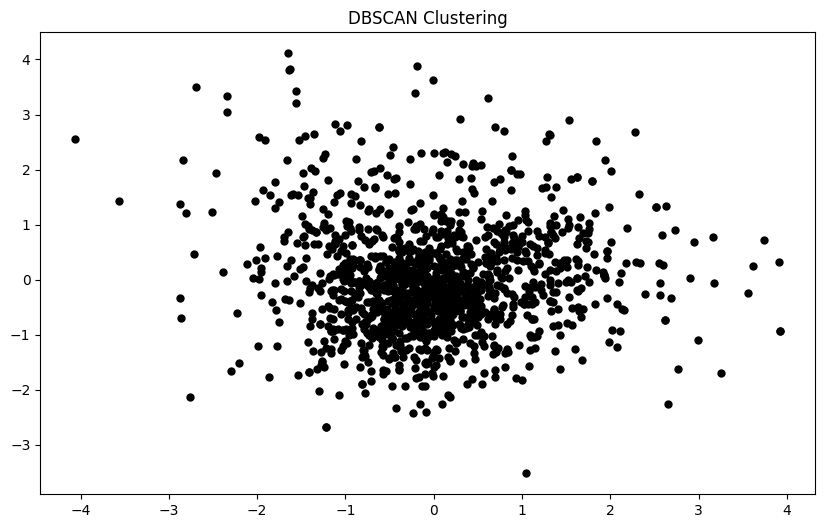

eps=0.1131578947368421; min_samples=2


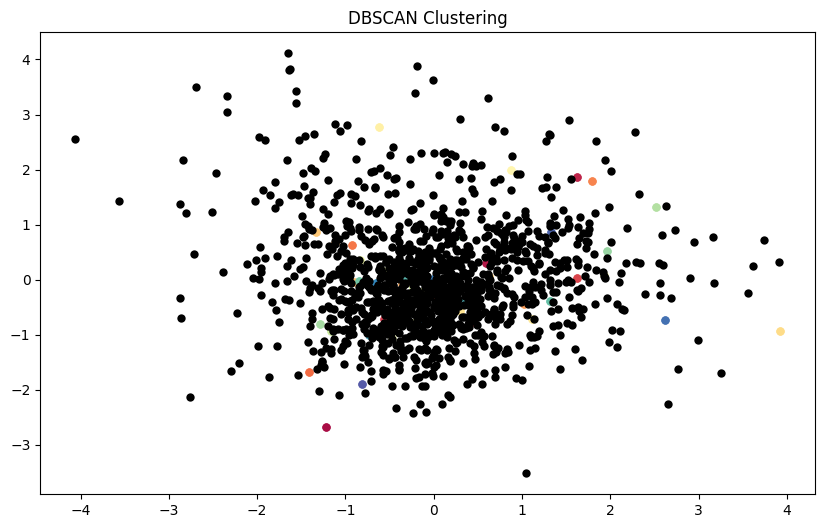

eps=0.1131578947368421; min_samples=3


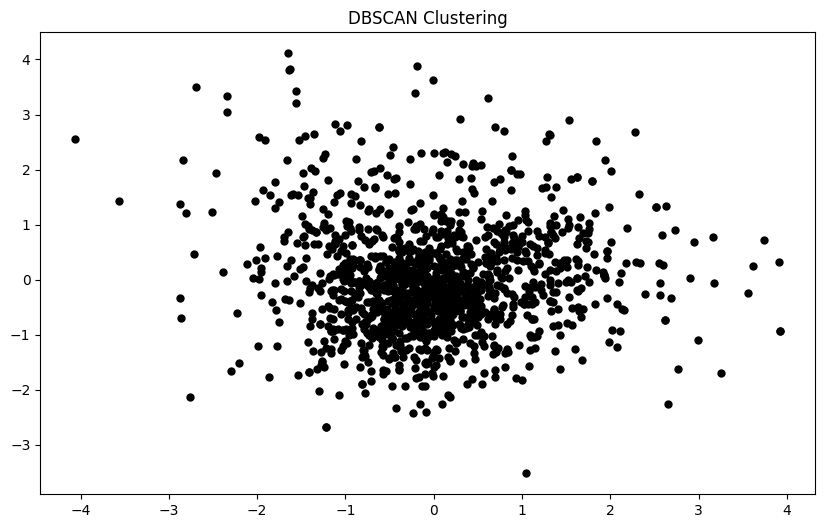

eps=0.1131578947368421; min_samples=4


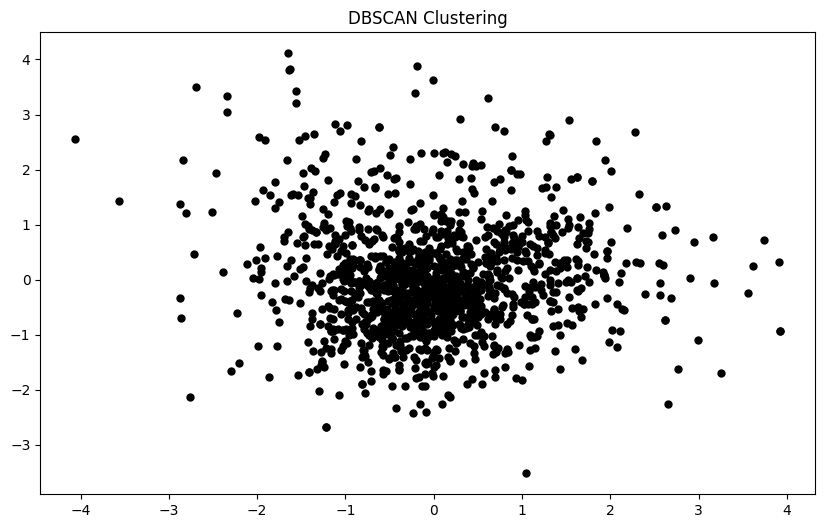

eps=0.13894736842105262; min_samples=2


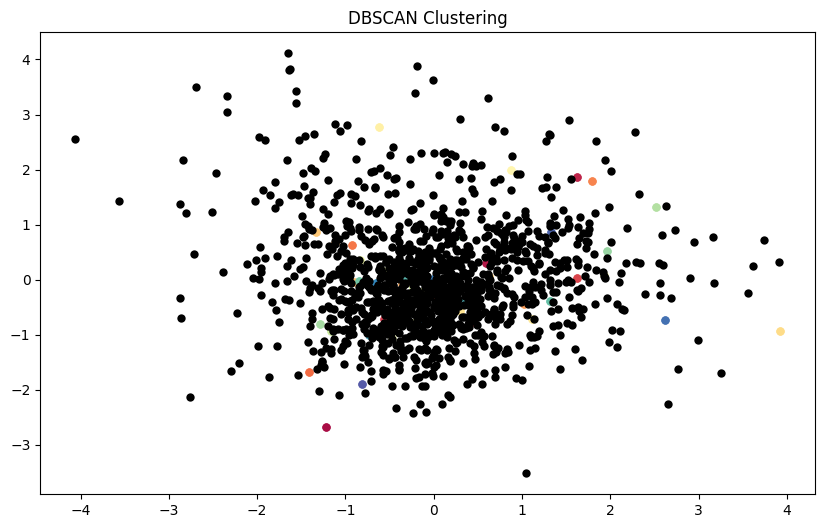

eps=0.13894736842105262; min_samples=3


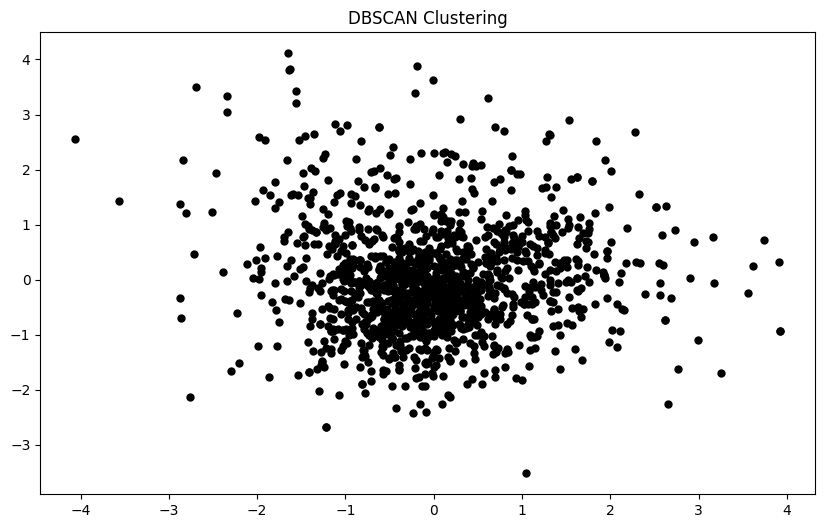

eps=0.13894736842105262; min_samples=4


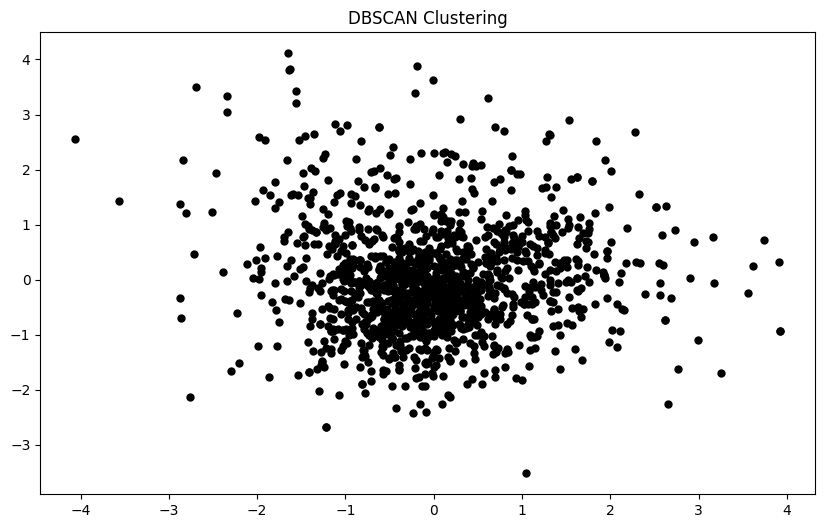

eps=0.16473684210526315; min_samples=2


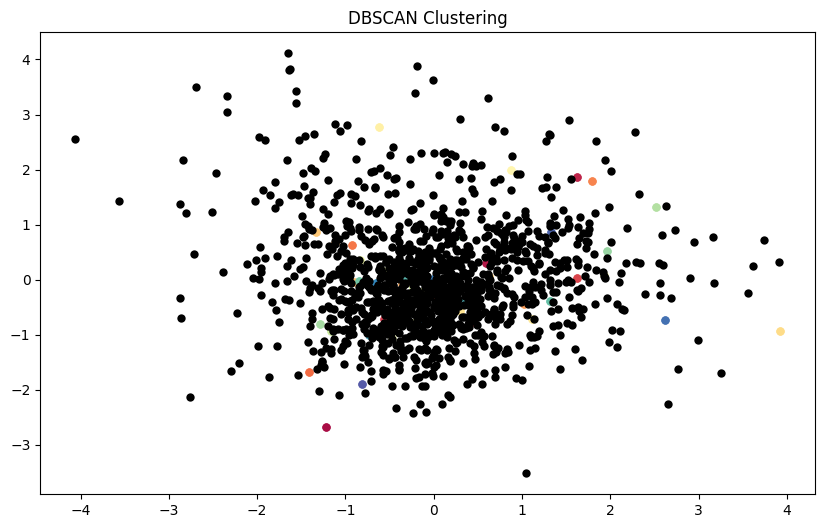

eps=0.16473684210526315; min_samples=3


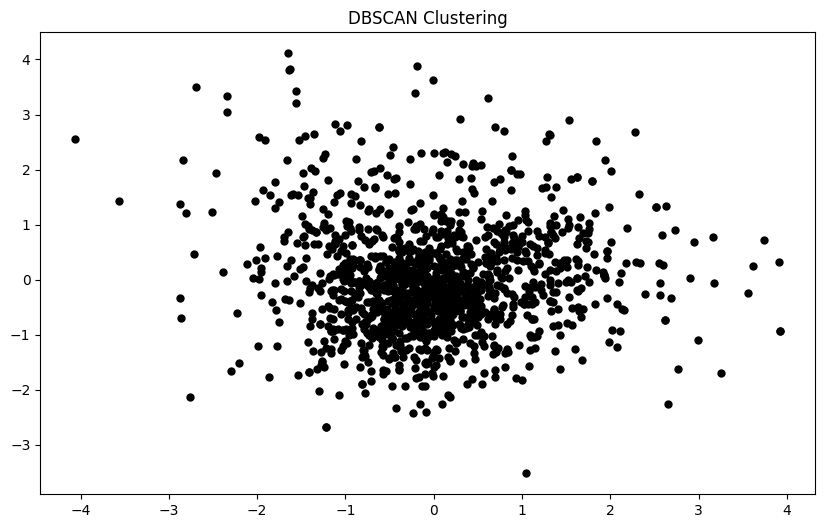

eps=0.16473684210526315; min_samples=4


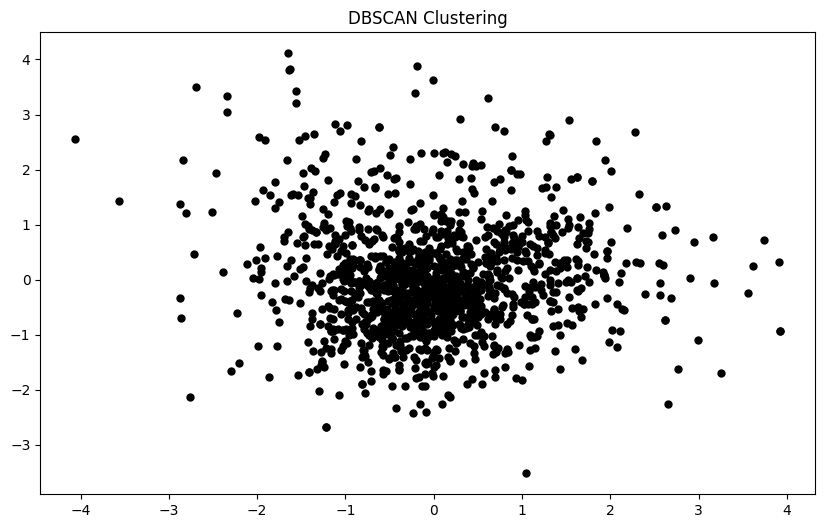

eps=0.19052631578947368; min_samples=2


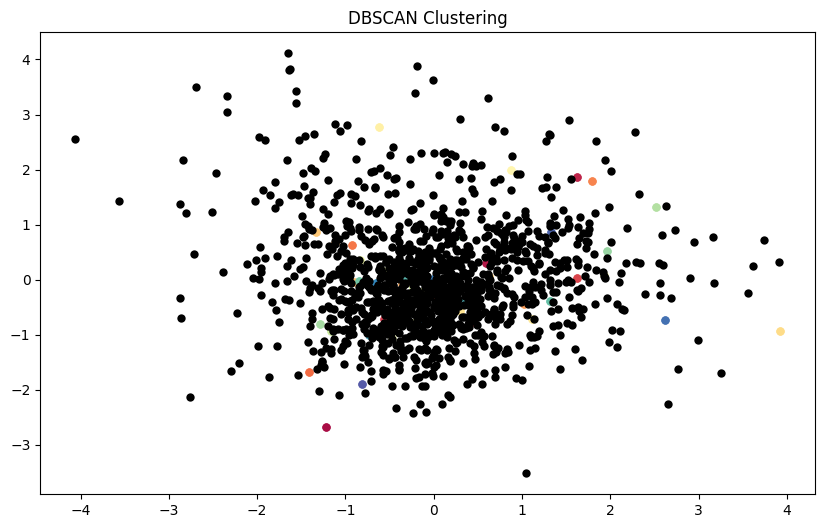

eps=0.19052631578947368; min_samples=3


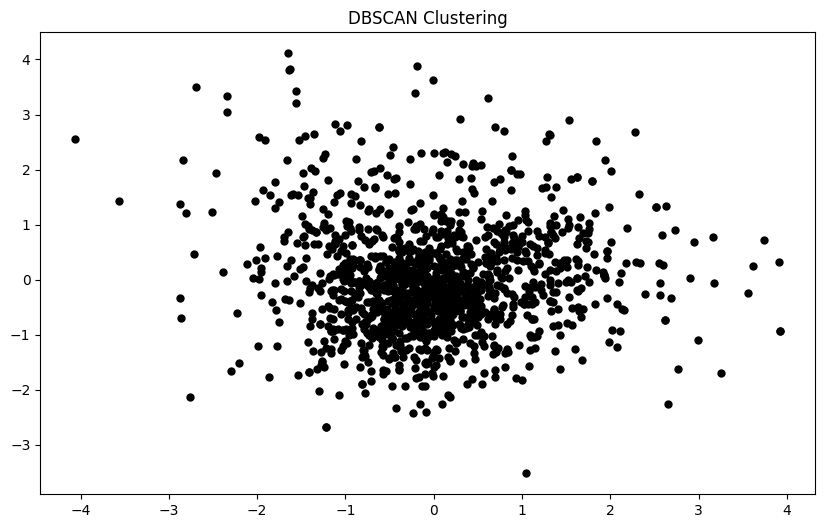

eps=0.19052631578947368; min_samples=4


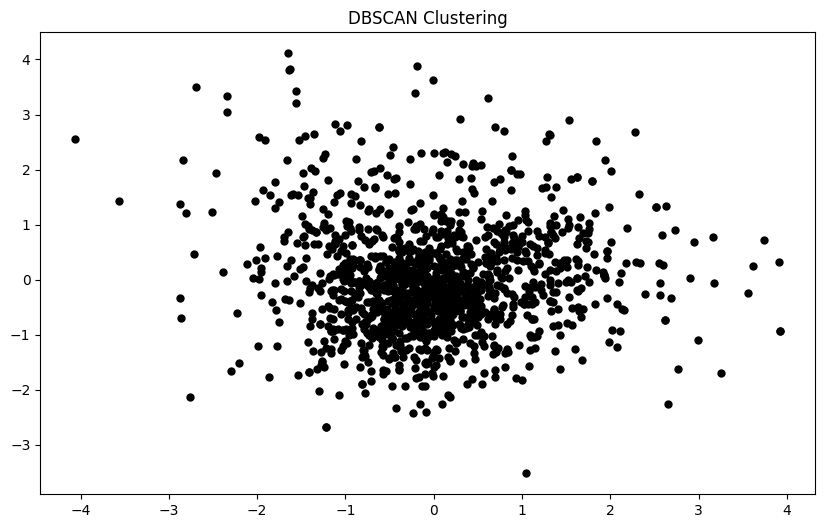

eps=0.2163157894736842; min_samples=2


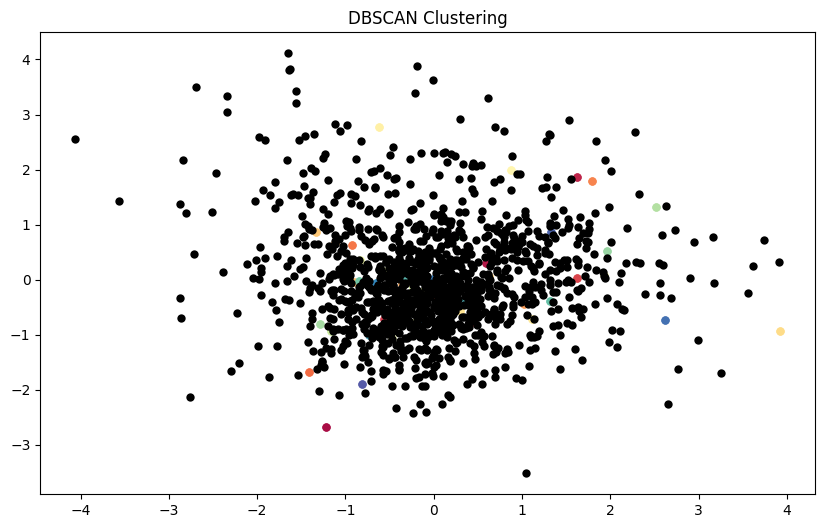

eps=0.2163157894736842; min_samples=3


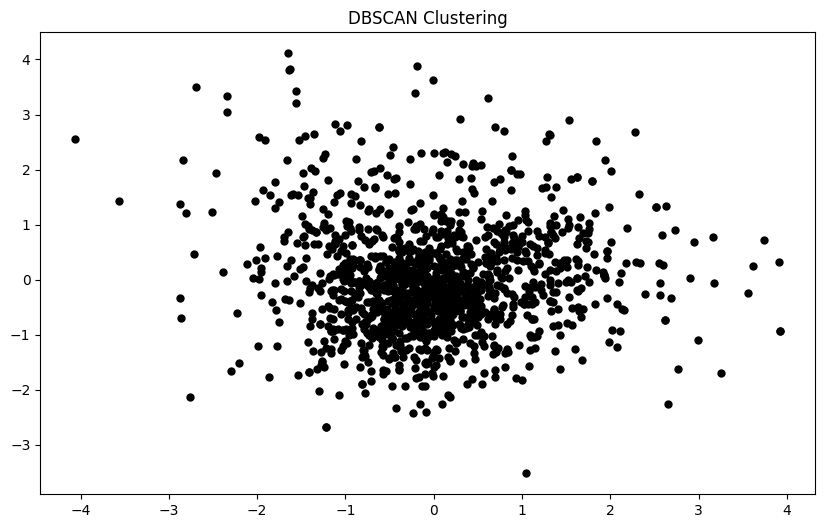

eps=0.2163157894736842; min_samples=4


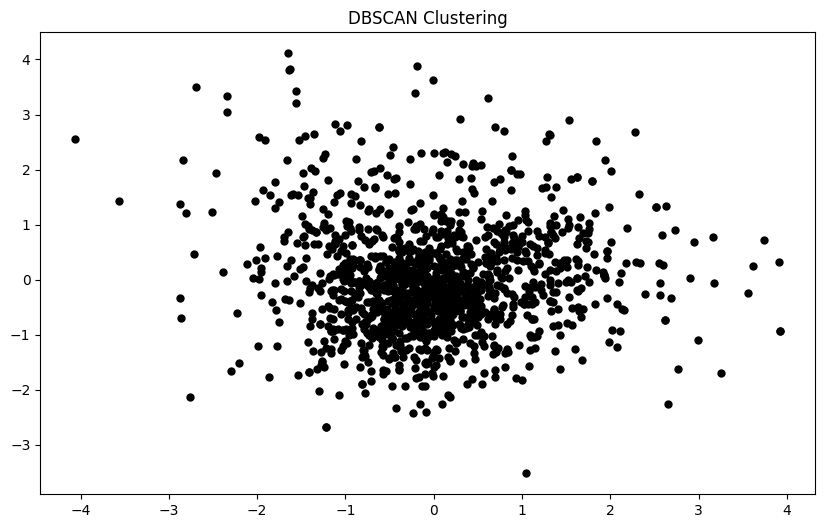

eps=0.24210526315789474; min_samples=2


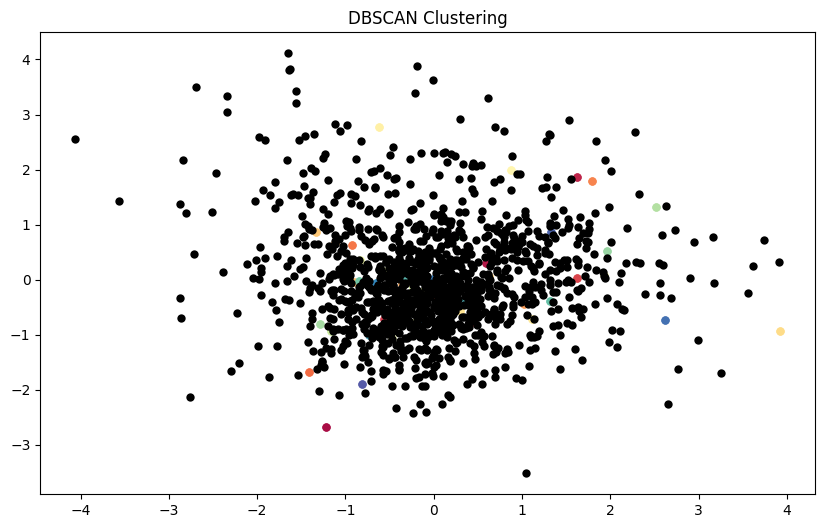

eps=0.24210526315789474; min_samples=3


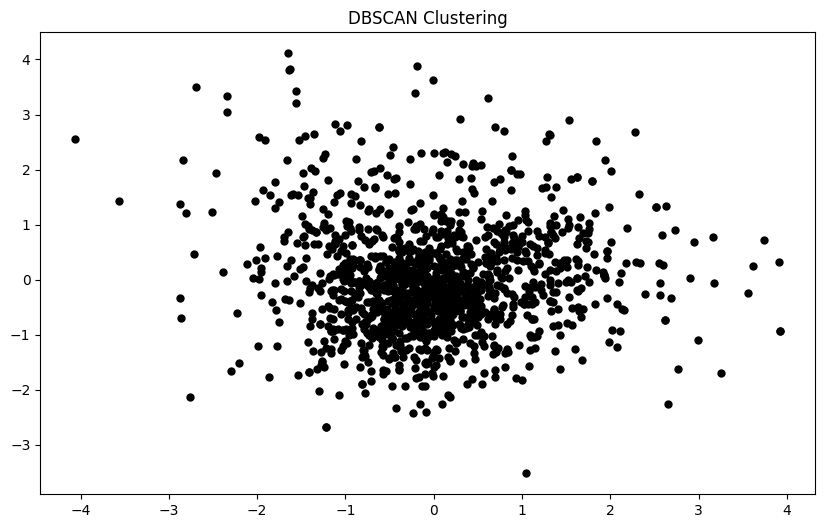

eps=0.24210526315789474; min_samples=4


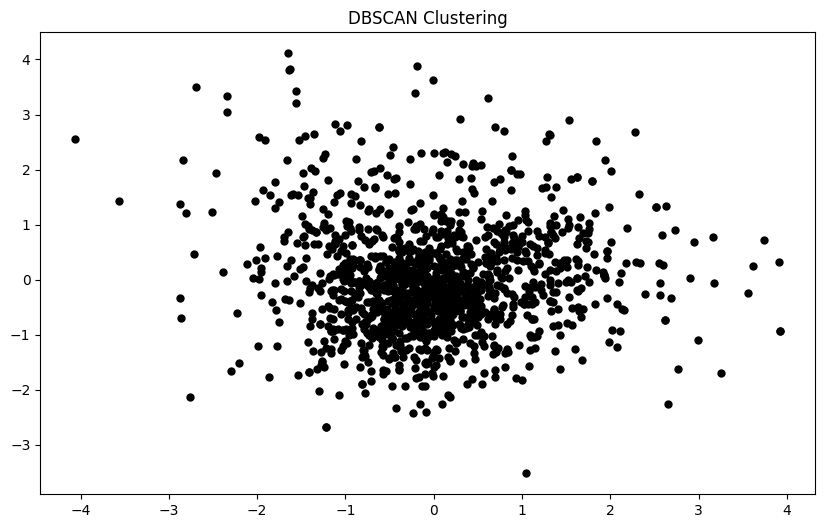

eps=0.26789473684210524; min_samples=2


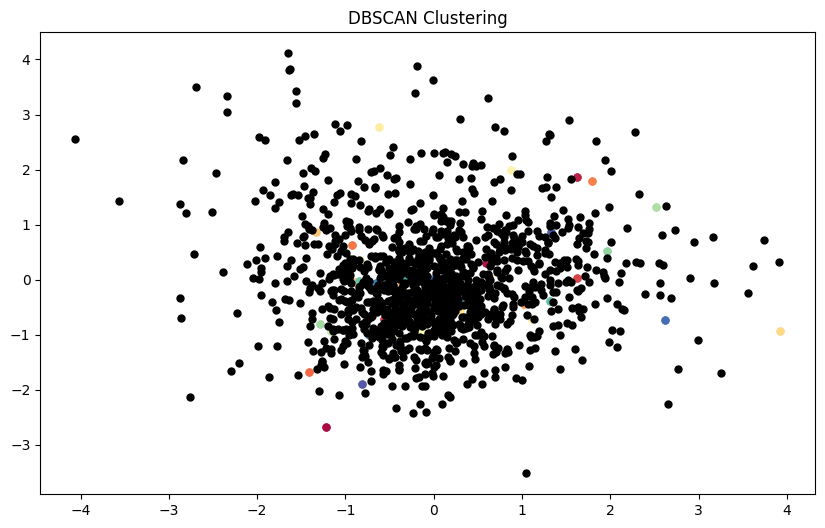

eps=0.26789473684210524; min_samples=3


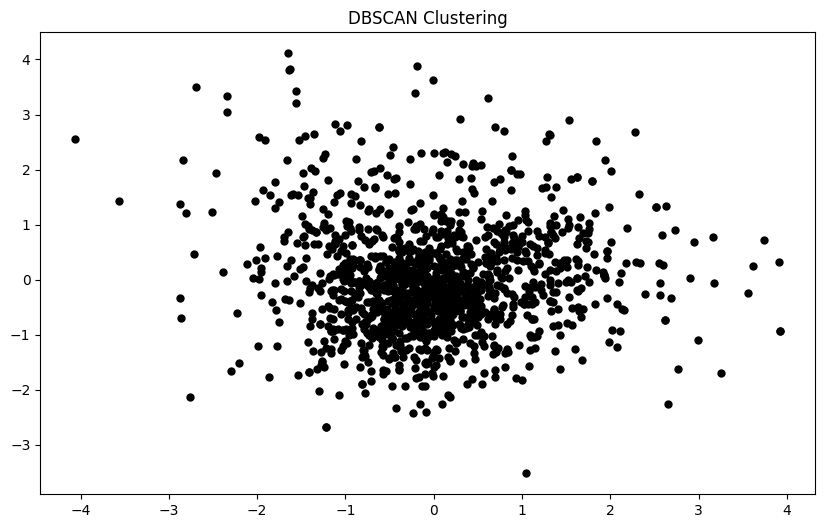

eps=0.26789473684210524; min_samples=4


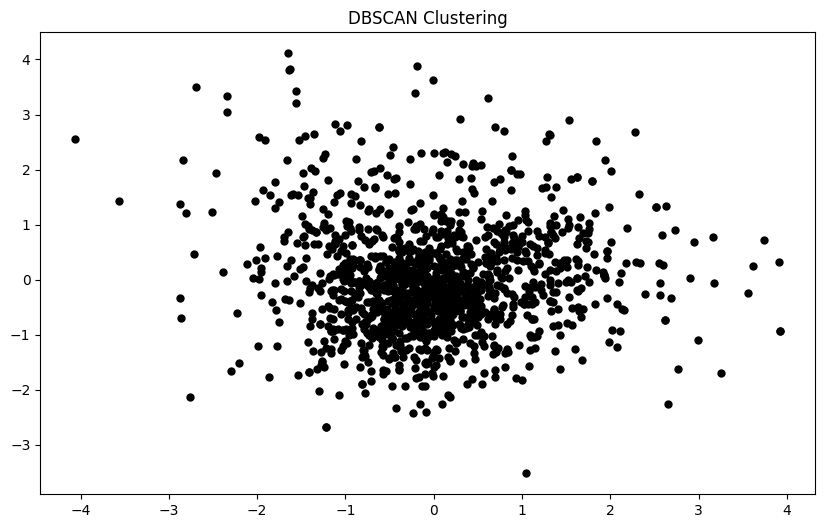

eps=0.29368421052631577; min_samples=2


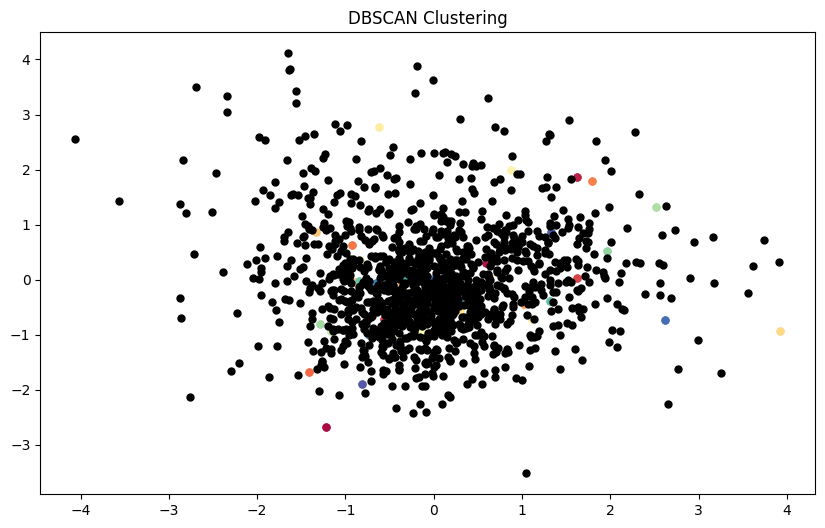

eps=0.29368421052631577; min_samples=3


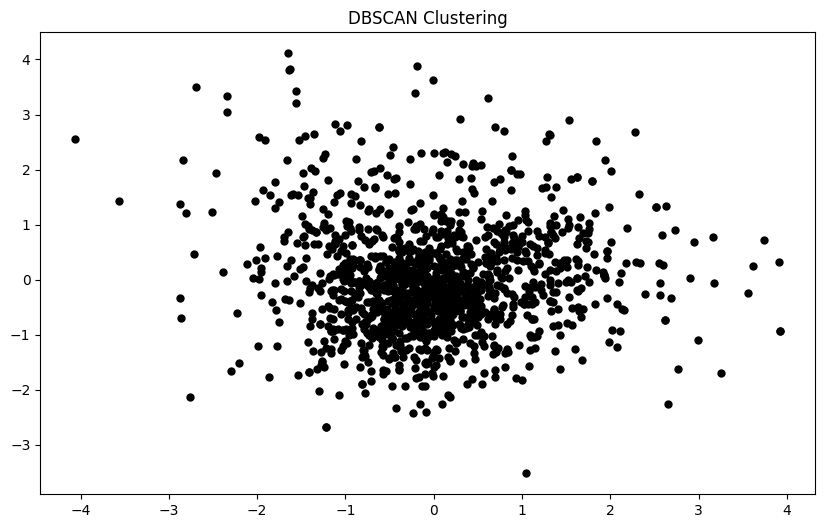

eps=0.29368421052631577; min_samples=4


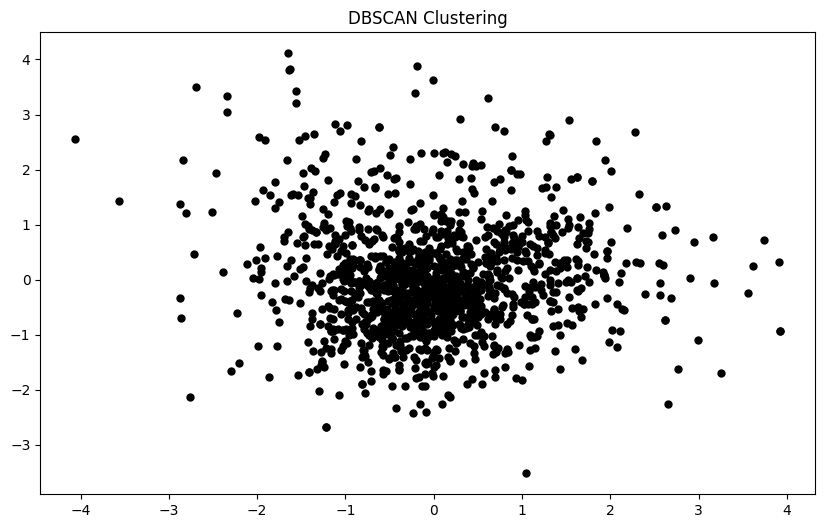

eps=0.3194736842105263; min_samples=2


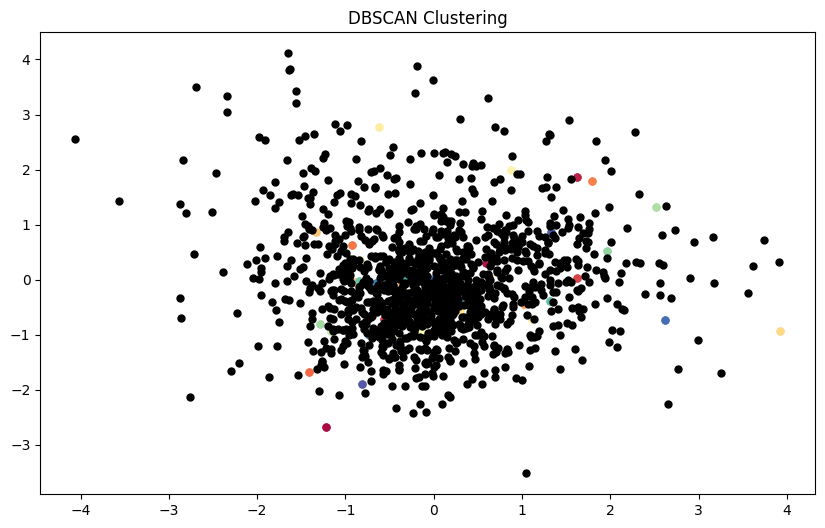

eps=0.3194736842105263; min_samples=3


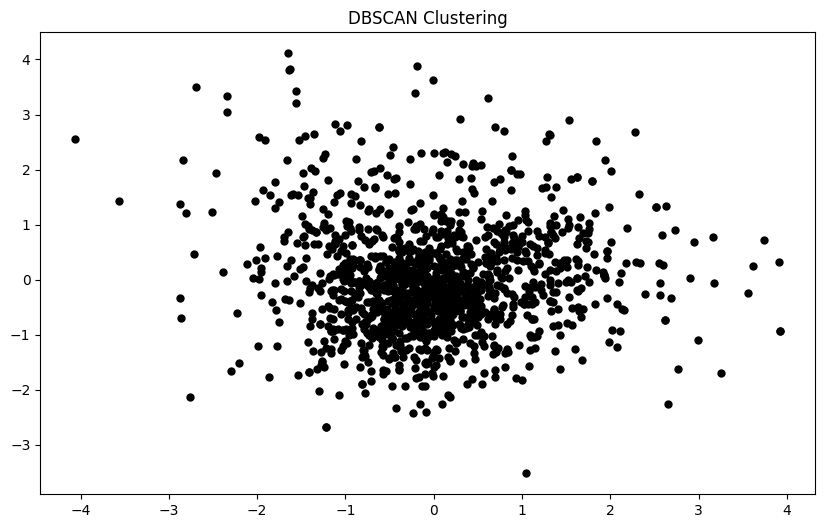

eps=0.3194736842105263; min_samples=4


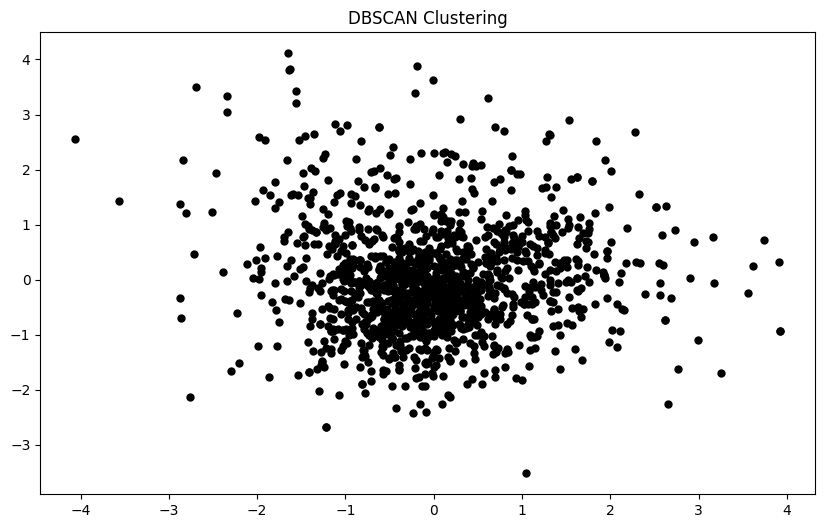

eps=0.3452631578947368; min_samples=2


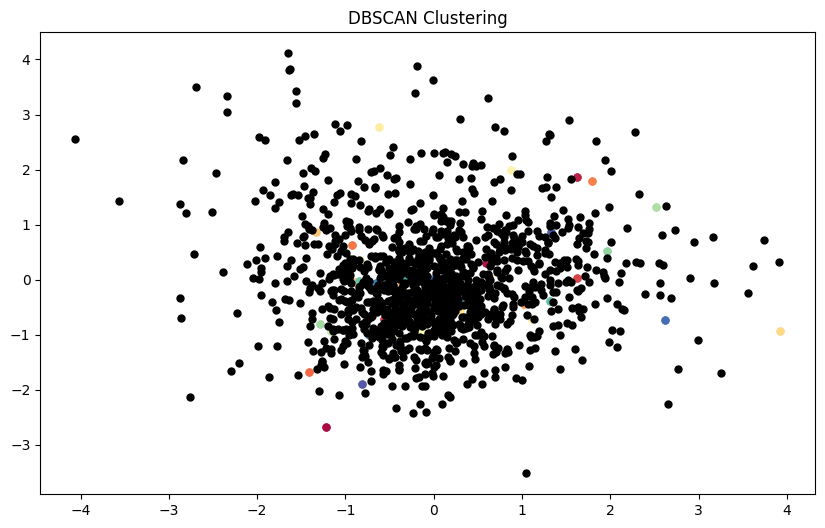

eps=0.3452631578947368; min_samples=3


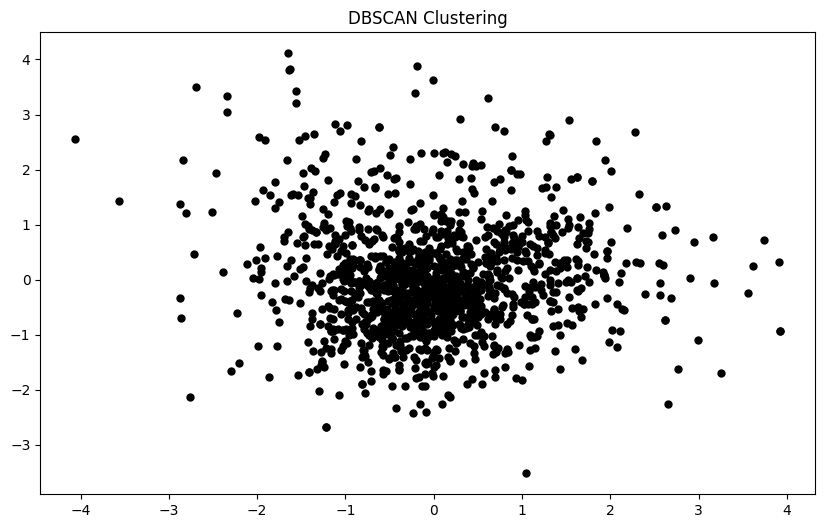

eps=0.3452631578947368; min_samples=4


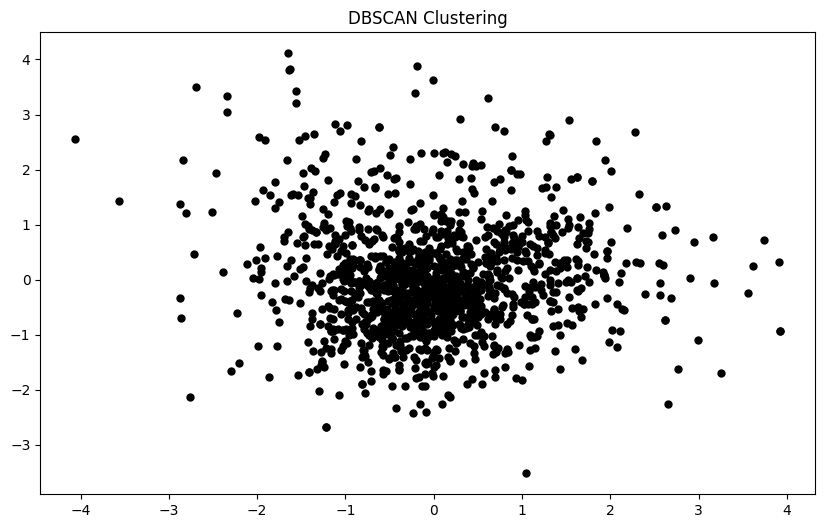

eps=0.37105263157894736; min_samples=2


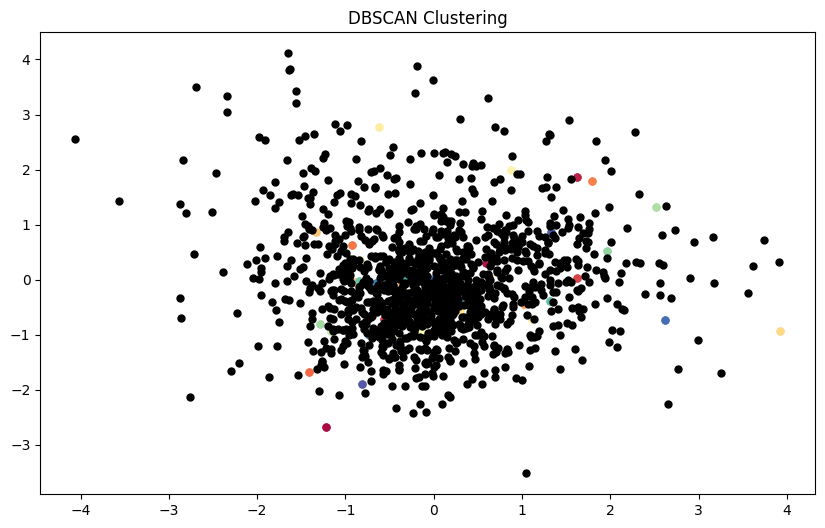

eps=0.37105263157894736; min_samples=3


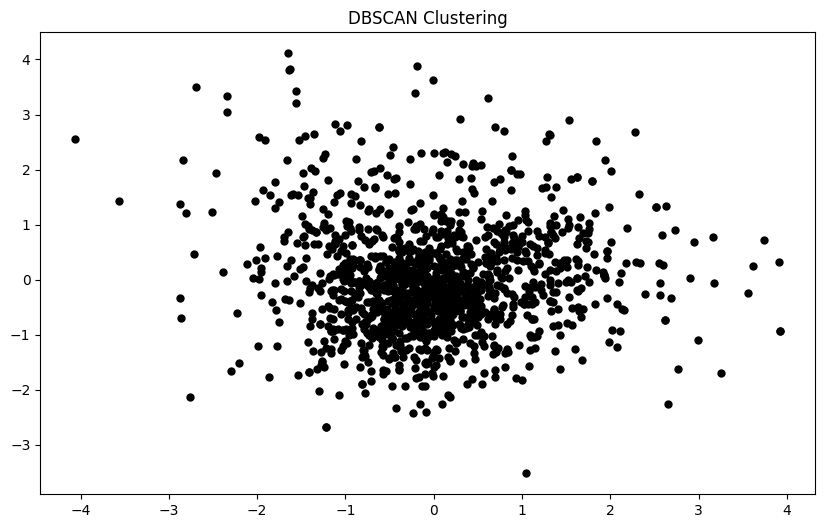

eps=0.37105263157894736; min_samples=4


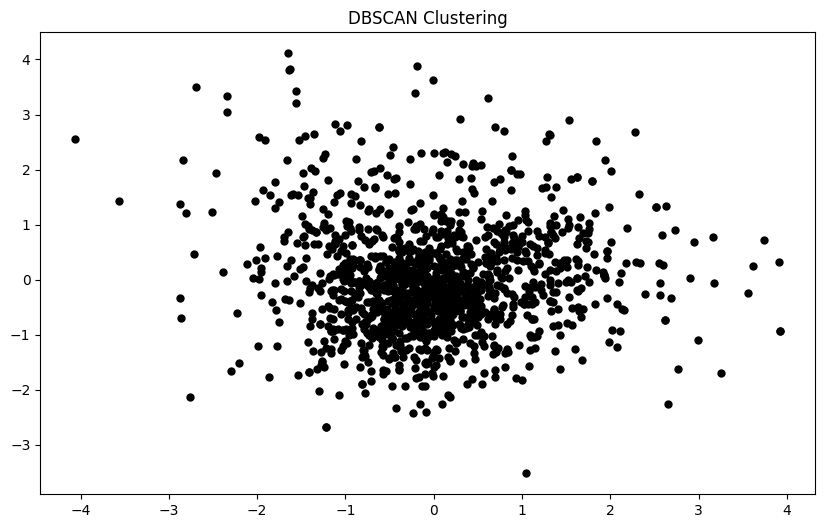

eps=0.3968421052631579; min_samples=2


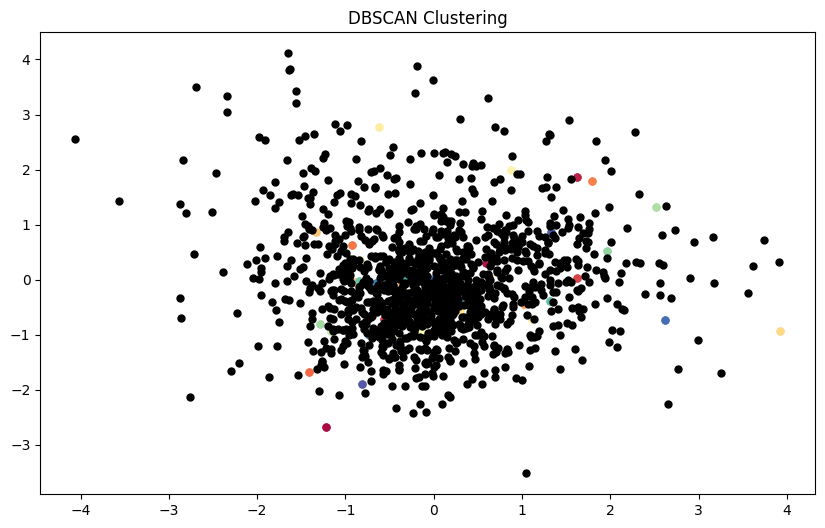

eps=0.3968421052631579; min_samples=3


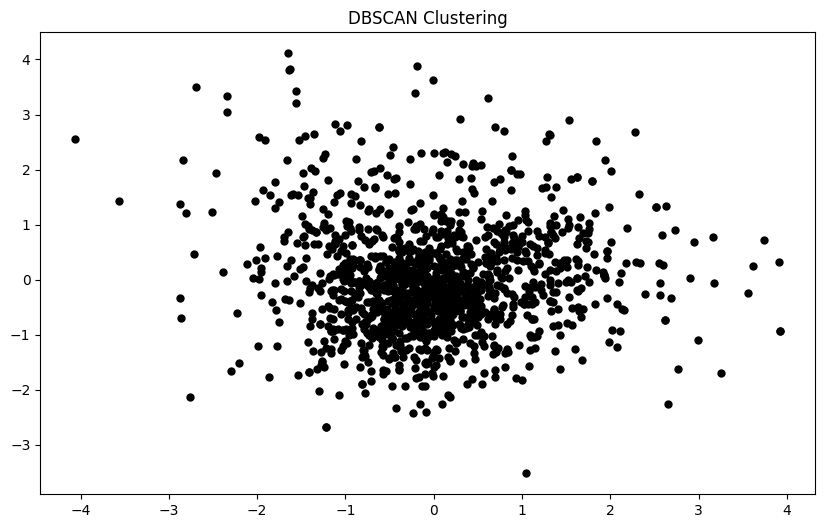

eps=0.3968421052631579; min_samples=4


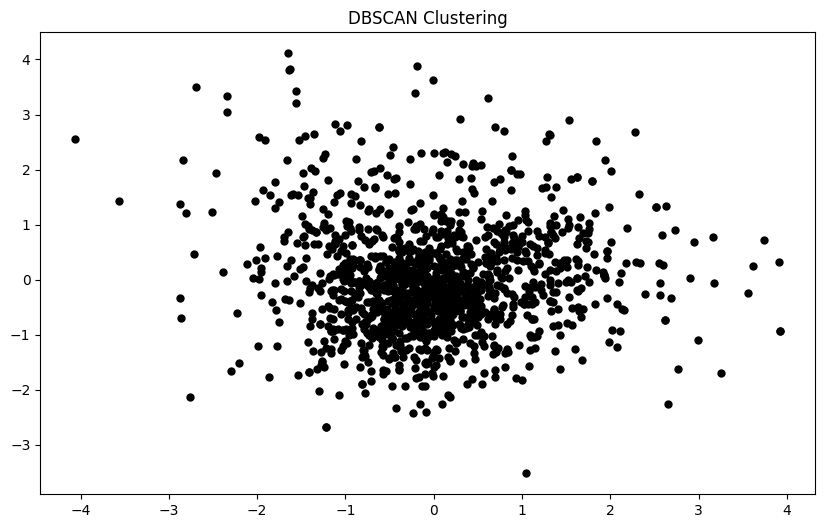

eps=0.4226315789473684; min_samples=2


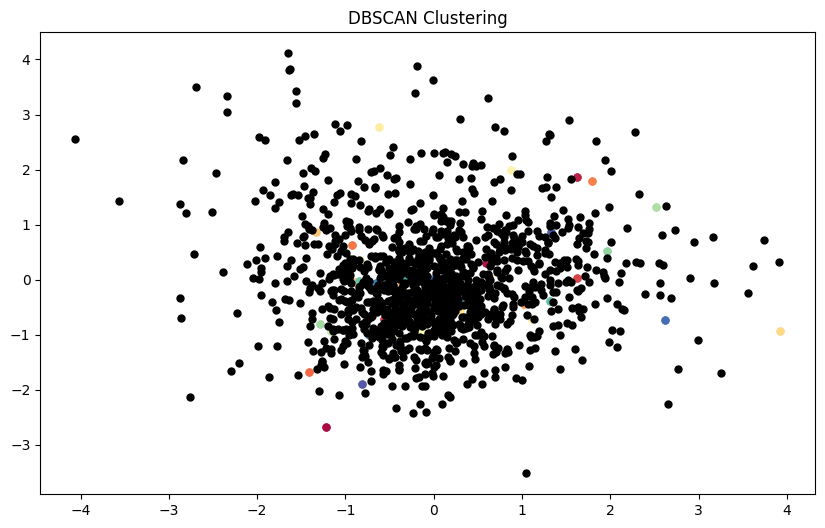

eps=0.4226315789473684; min_samples=3


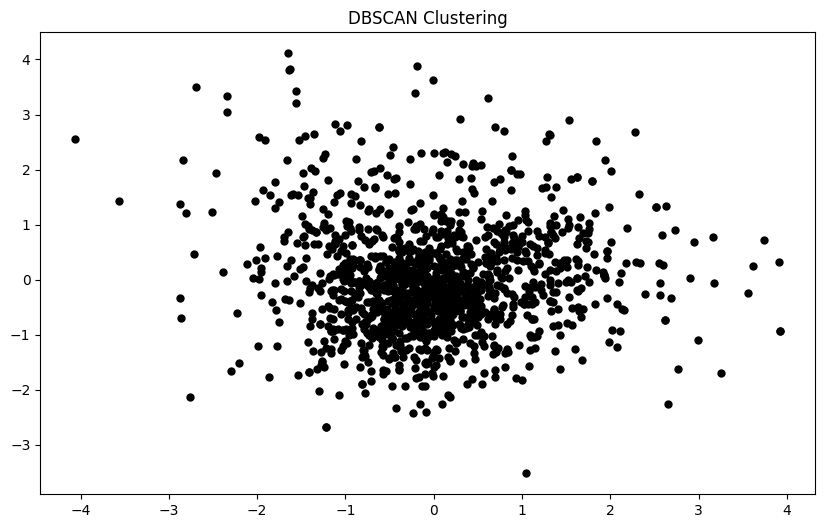

eps=0.4226315789473684; min_samples=4


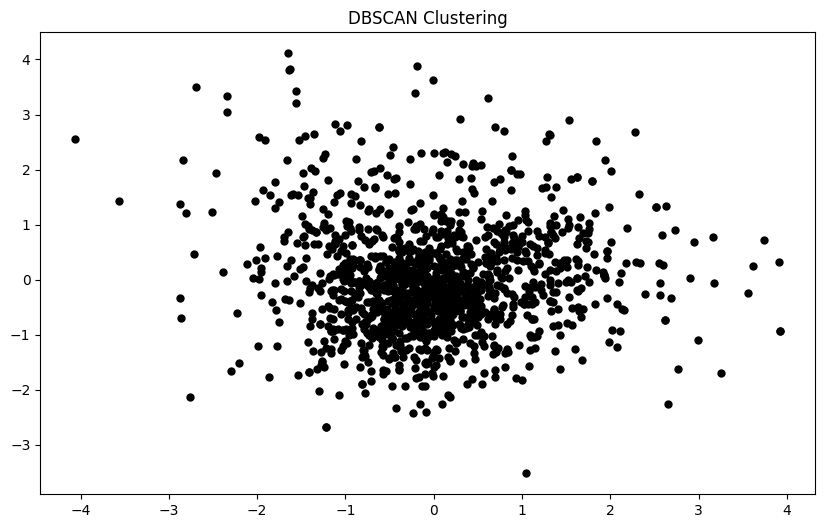

eps=0.44842105263157894; min_samples=2


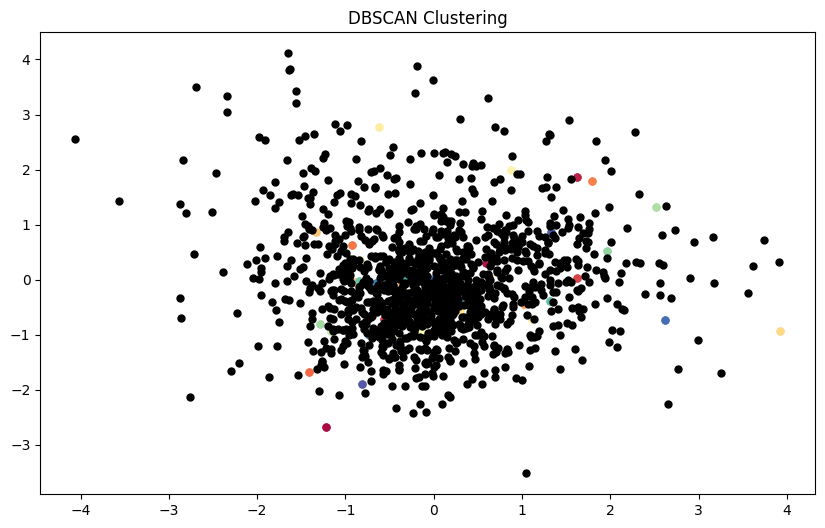

eps=0.44842105263157894; min_samples=3


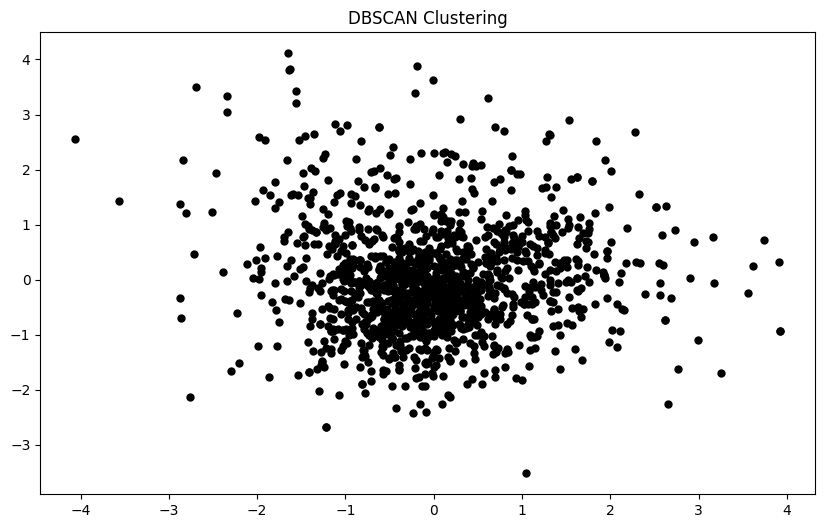

eps=0.44842105263157894; min_samples=4


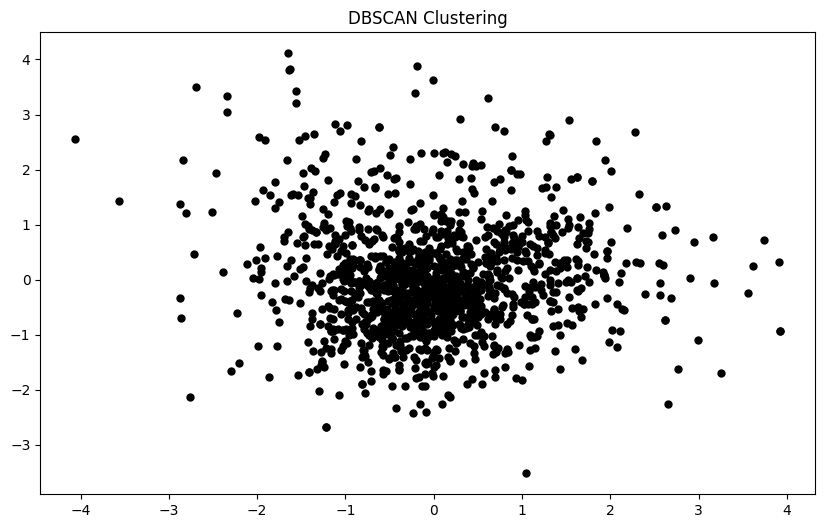

eps=0.47421052631578947; min_samples=2


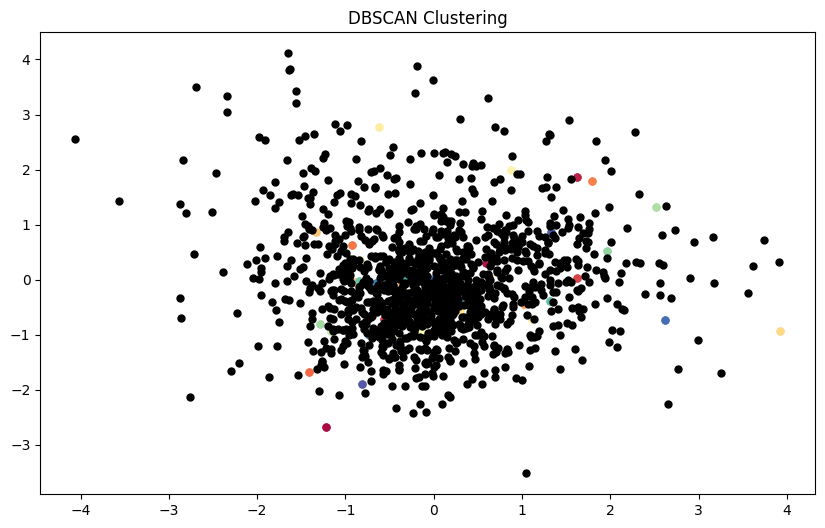

eps=0.47421052631578947; min_samples=3


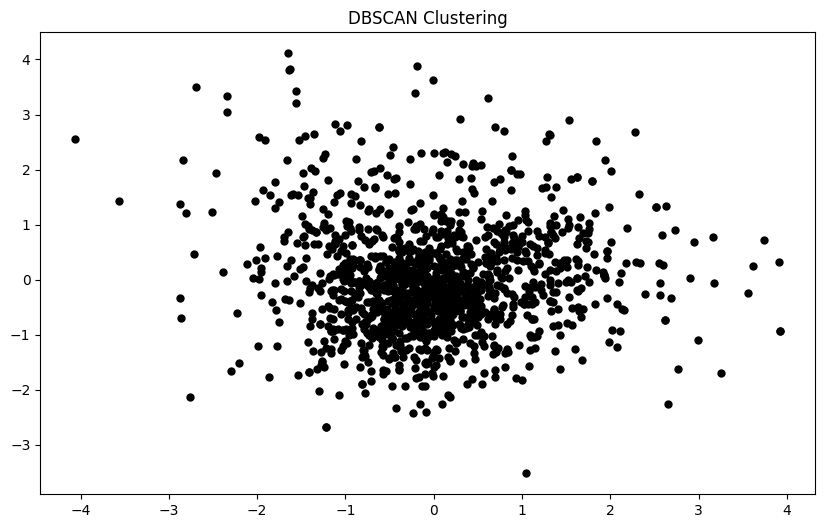

eps=0.47421052631578947; min_samples=4


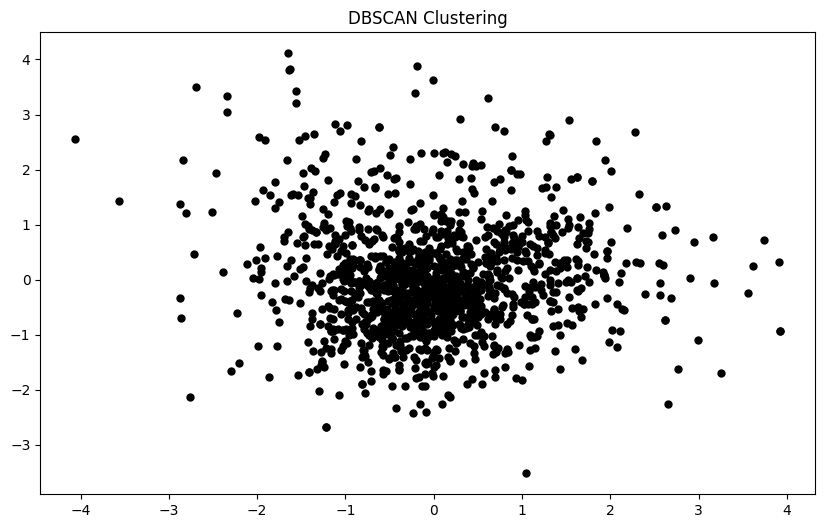

eps=0.5; min_samples=2


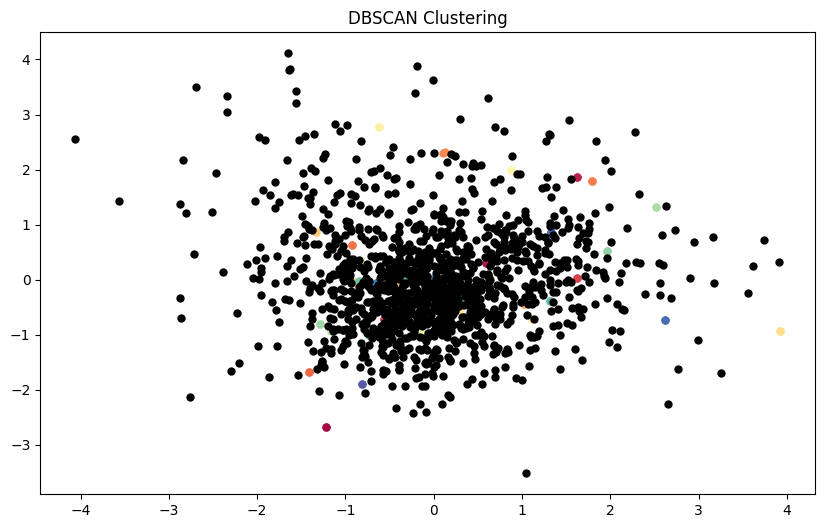

eps=0.5; min_samples=3


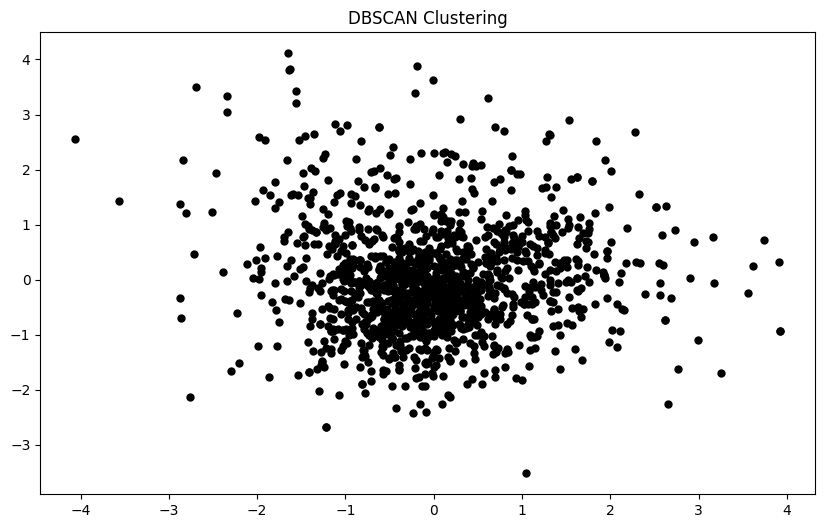

eps=0.5; min_samples=4


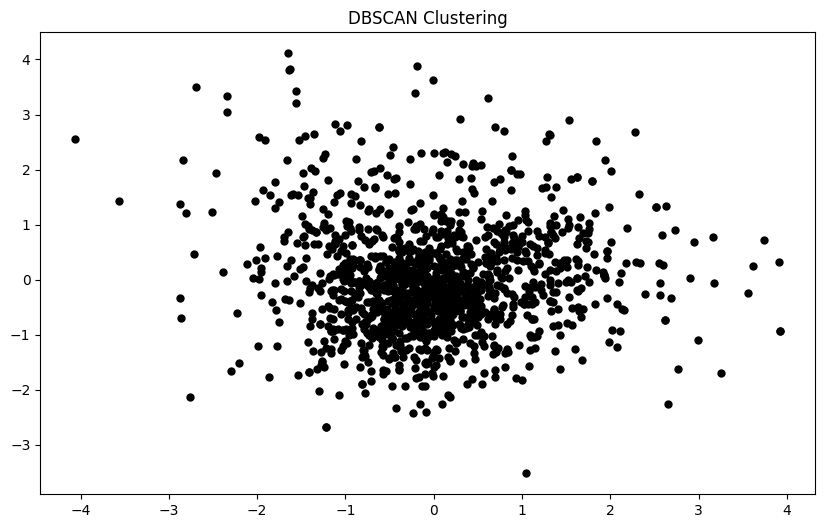

In [53]:
# Step 3: Apply DBSCAN
# for i in float_range:
for i in float_range:
    for j in range(2, 5):
        print(f'eps={i}; min_samples={j}')
        dbscan = DBSCAN(eps=i, min_samples=j)  # Adjust `eps` and `min_samples` as needed
        # labels = dbscan.fit_predict(features_normalized)
        labels = dbscan.fit_predict(features_reduced)
        
        # Step 4: Visualize the clustering
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
        
        plt.figure(figsize=(10, 6))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = [0, 0, 0, 1]
        
            class_member_mask = (labels == k)
        
            xy = features_normalized[class_member_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgewidth=0, markersize=6)
        
        plt.title('DBSCAN Clustering')
        plt.show()